In [ ]:
dict(
    author="Rob Stenson",
    title="DrawBot",
    date="1/6/2023"
)

## Drawbot-in-Coldtype

Though [DrawBot](https://drawbot.com) and Coldtype encourage different programming styles, DrawBot can be used inside Coldtype, by using a special type of renderable — the `@drawbot_script` renderable.

### Installing

DrawBot is not installed by default with Coldtype, so you’ll need to install DrawBot in your virtualenv, like so:

```
pip install git+https://github.com/typemytype/drawbot
```

Now that you’ve got the module version of DrawBot installed, with just a little bit of preamble and the `@drawbot_script` renderable, you can now use Coldtype to do anything you'd normally do in a DrawBot script.


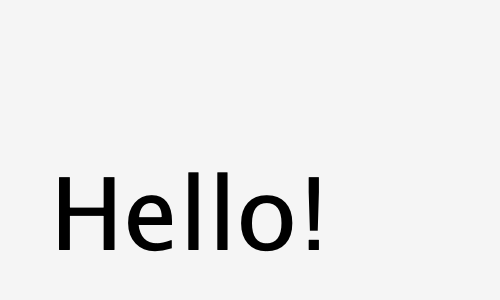

In [2]:
from coldtype.drawbot import *
from drawBot import *

@drawbot_renderable((500, 300))
def db_text(r):
    fontSize(100)
    text("Hello!", (50, 50))

db_text.notebook_display() #hide-publish

Unlike other renderables, the `@drawbot_renderable` renderable is “self-rasterizing,” meaning what it communicates to the renderer is not data about what to draw, but the path to a pre-baked image. The details of that process aren't that important, but the takeaway is that this is pretty close to a normal DrawBot programming session, with the caveat that when you zoom in and out in the viewer, the script must re-render completely, because what you’re seeing is an image (and not a PDF like you see the DrawBot app). (More about zooming down below in "Scaling.")

Another caveat is that drawBot's ``newPage`` and ``size`` functions won’t work, as the dimensions of a graphic must be passed to the ``@drawbot_renderable`` decorator, ala ``@drawbot_renderable((500, 500))`` if you wanted a 500px x 500px graphic. (More down below on why ``newPage`` doesn’t make sense in Coldtype.)

## Combining Idioms

You might be wondering why you’d want to use DrawBot in Coldtype. To me, one big upside is being able to use any text editor you want, rather than the DrawBot app itself.


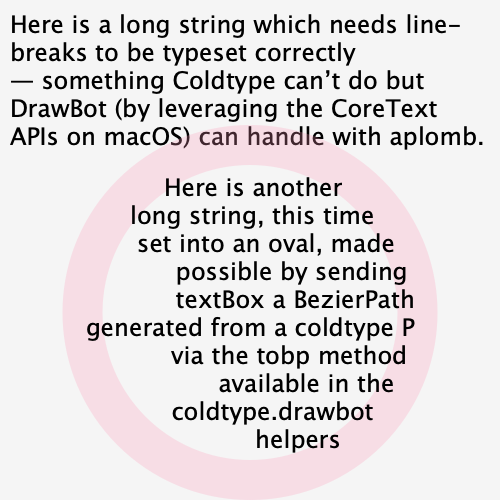

In [3]:
import coldtype.drawbot as ctdb
from drawBot import *

long_txt1 = "Here is a long string which needs line-breaks to be typeset correctly — something Coldtype can’t do but DrawBot (by leveraging the CoreText APIs on macOS) can handle with aplomb."
    
long_txt2 = "Here is another long string, this time set into an oval, made possible by sending textBox a BezierPath generated from a coldtype P via the tobp method available in the coldtype.drawbot helpers module."

@drawbot_script((500, 500))
def combined_idioms(r):
    fontSize(24)
    textBox(long_txt1, r.inset(10))
    # Coldtype Rect's can be passed anywhere a rectangle-like list would be passed in DrawBot

    oval = (P()
        .oval(r.take(0.75, "mny")
            .inset(20).square()))

    (oval.copy()
        .outline(20)
        .f(hsl(0.95, 1, 0.8, a=0.25))
        .chain(ctdb.dbdraw))
    
    textBox(long_txt2,
        ctdb.tobp(oval), align="right")

combined_idioms.notebook_display() #hide-publish

## Multi-page documents

In general, Coldtype does not support the idea of a multi-page document; the closest thing supported natively by Coldtype is an `@animation` renderable — and if you think about it, what’s the real difference between a multi-frame animation and a multi-page document? Luckily there’s a `@drawbot_animation` renderable that makes multi-frame drawBot animations very easy.

All that said, it is still quite possible to do normal DrawBot things in a Coldtype script. So here’s an example of generating a multi-page PDF, using a combination of Coldtype and DrawBot constructs.

In [4]:
from coldtype.drawbot import *
from drawBot import *

@drawbot_animation((500, 200))
def multipage_doc(f):
    c = hsl(f.e("l", 0), s=0.5, l=0.5)
    (P(f.a.r)
        .f(c)
        .chain(ctdb.dbdraw))
    fontSize(50)
    fill(1)
    textBox("Page " + str(f.i), f.a.r.inset(50))


def release(passes):
    ctdb.pdfdoc(multipage_doc,
        "examples/drawbot/drawbot_multipage.pdf")

The key to making the above work is the magic function `release`, which can be defined once in any Coldtype source file, and provides a "second chance" to create artifacts based on what's been rendered by the coldtype renderer. The salient point here is that you can write your own special code to run whenever the `release` action is called, which can be outside the standard save/reload/render workflow of Coldtype. This can be useful for all kinds of things (it’s how this documentation is generated, for example), but here it's useful because we're saying, *OK, the graphics look good, let's now use DrawBot to bake a PDF, using the same code that we've been editing and previewing via the Coldtype viewer.*

How to trigger the release code? It’s as easy as hitting the R key with the viewer app focused.

## Scaling

Because the default behavior of DrawBot is to display a PDF of the result of your code and to zoom in on a composition automatically, you might be surprised that graphics appear pretty small in the Coldtype viewer window by default, because Coldtype defaults to showing the graphics at their actual size. If you'd like to default to showing your graphics at a higher resolution (i.e. if you’re making a PDF), there are a few options:

* You can zoom in with +/- on your keyboard in the viewer app

* You can specify a `preview-scale` argument to the renderer itself when you start it on the command-line, ala `coldtype drawbot_script.py -ps 2`

## Coldtype-in-DrawBot

If you’re used to Coldtype idioms but want to use DrawBot, you can install the core functionality of Coldtype in DrawBot and use it like a normal Python package.

To install Coldtype in DrawBot, open up DrawBot and then navigate via the top bar to Python > Install Python Packages. There you can switch the input selector to "Install" and then type in "coldtype".

Now you should be able to access Coldtype-in-DrawBot, like so:

In [ ]:
from coldtype.drawbot import *

r = page_rect()
fp = "/System/Library/Fonts/SFCompactRounded.ttf"
f = Font.Cacheable(fp)

(StSt("Coldtype", f, 200, r, wght=1)
    .f(hsl(0.8))
    .align(r)
    .chain(dbdraw))